In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-07-26 18:00:10.862426: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-26 18:00:10.893130: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-26 18:00:11.354633: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')
df_desagregar = pd.DataFrame(df[['Ano','Polvo_art','Polvo_ind','Polvo_art_ind','Ostra_art','Mexilhao_art','TOTAL_MOLLUSCS']])

#Juntando valores de art e ind em art_ind(quando os 2 estão presentes) 
  #Polvos
for i in range(len(df_desagregar['Ano'])):
  if pd.isnull(df_desagregar.iloc[i,3])==True and pd.isnull(df_desagregar.iloc[i,2])==False and pd.isnull(df_desagregar.iloc[i,1])==False:
    df_desagregar.iloc[i,3] = df_desagregar.iloc[i,2] + df_desagregar.iloc[i,1] 


dados = df_desagregar[['Ano','Polvo_art_ind','Ostra_art','Mexilhao_art']].dropna().reset_index(drop=True)

for i in range(len(dados['Ano'])):
  dados.loc[i,'Soma'] = dados.loc[i, 'Polvo_art_ind']+dados.loc[i,'Ostra_art']+dados.loc[i,'Mexilhao_art']
  
dados = dados[['Ano','Polvo_art_ind','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Polvo'] = dados.loc[i,'Polvo_art_ind'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1965,1969,1970,1971,1972,1973,1974,1975,1976,1977])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop = dados['Prop_Polvo'].values
dados.head()

,Ano,Polvo_art_ind,Soma,Prop_Polvo
0,1962,2.0,7.0,0.285714
1,1963,3.0,78.0,0.038462
2,1964,20.0,637.0,0.031397
3,1966,9.0,54.0,0.166667
4,1984,6.0,48.0,0.125000


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [4]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=500, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/Polvos/pesos prop polvos/.weights.h5', overwrite=True)

Epoch 1/500


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step - loss: 1.0241
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9782
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9406
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9016
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8611
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8139
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7573
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6932
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6214
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5427
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4605
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3792
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3049
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2452
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2047
Epoch 16/500
1/1 ━━━━━━━━━━━━━

In [5]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/Polvos/pesos prop polvos/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.20737794]
 [0.19690855]
 [0.19165933]
 [0.1862942 ]
 [0.1804275 ]
 [0.17446606]
 [0.16786018]
 [0.16155341]
 [0.15628232]
 [0.1517076 ]
 [0.14713287]
 [0.14273247]
 [0.12660961]
 [0.11433135]
 [0.11277235]
 [0.11195108]
 [0.11170185]
 [0.11173879]
 [0.11268108]
 [0.11417921]
 [0.11590606]
 [0.11780511]]


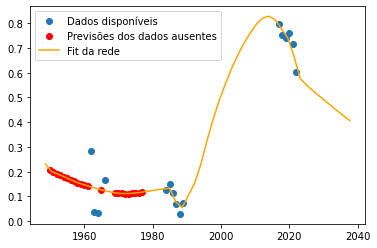

In [16]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

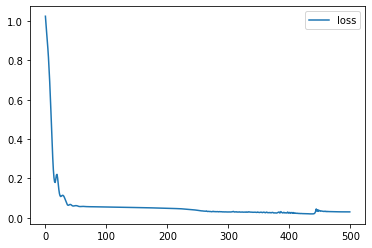

In [7]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [19]:
#Lista todos_anos normalizada e sua predição num dataframe       (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1


df_previsoes = pd.DataFrame({'Ano':anos,'Prop_Polvo':prev_continua.flatten()})


#Dataframe de valores de pesca baseando-se nas previsões de TOTAL_MOLLUSCS sem Lula
TOTAL_MOLLUSCS_preenchido = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/Lulas/TOTAL_MOLLUSCS_sem_lu.xlsx')

for i in range(len(df_previsoes['Ano'])):
   df_previsoes.loc[i,'Prop_Polvo'] = float(df_previsoes.loc[i,'Prop_Polvo'])*float(TOTAL_MOLLUSCS_preenchido.loc[i,'TOTAL_MOLLUSCS'])




#Planilha com os dados preenchidos
df_preenchido = df[['Ano','Polvo_art_ind']]

for i in range(len(prev_continua)):
        df_preenchido.iloc[i,1] = df_previsoes.iloc[i,1]

with pd.option_context('display.max_rows', None,):
    print(df_preenchido)


df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/Polvos/Previsão Polvo_art_ind_1950-1977.xlsx')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
     Ano  Polvo_art_ind
0   1950       2.070207
1   1951       2.428455
2   1952       2.838348
3   1953       2.946922
4   1954       2.739738
5   1955       2.426876
6   1956       2.918153
7   1957       4.302151
8   1958       2.985042
9   1959       1.577514
10  1960       2.974245
11  1961       2.508199
12  1962       5.261331
13  1963      18.919373
14  1964      92.016829
15  1965      39.720547
16  1966       9.254023
17  1967      17.431985
18  1968      98.743753
19  1969       8.590302
20  1970      18.689095
21  1971       8.829783
22  1972      15.662514
23  1973      33.458713
24  1974      44.006868
25  1975      14.624955
26  1976       6.192272
27  1977      17.048157
28  1978            NaN
29  1979            NaN
30  1980            NaN
31  1981            NaN
32  1982            NaN
33  1983            NaN
34  1984            NaN
35  1985            NaN
36  1986            NaN
37  1987            NaN
38  1988            NaN
39

/tmp/ipykernel_24908/2158543380.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.070206696866169' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df_previsoes.loc[i,'Prop_Polvo'] = float(df_previsoes.loc[i,'Prop_Polvo'])*float(TOTAL_MOLLUSCS_preenchido.loc[i,'TOTAL_MOLLUSCS'])


In [15]:
#Planilha de TOTAL_MOLLUSCS sem Lula_art_ind e Polvo_art_ind
TOTAL_MOLLUSCS_sem_lu_po = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/Lulas/TOTAL_MOLLUSCS_sem_lu.xlsx')
for i in range(len(prev_continua)):
    if i+1950 in anos_para_prever:
        TOTAL_MOLLUSCS_sem_lu_po.loc[i,'TOTAL_MOLLUSCS'] -= TOTAL_MOLLUSCS_sem_lu_po.loc[i,'TOTAL_MOLLUSCS']*prev_continua[i]
        
TOTAL_MOLLUSCS_sem_lu_po = TOTAL_MOLLUSCS_sem_lu_po[['Ano','TOTAL_MOLLUSCS']]
TOTAL_MOLLUSCS_sem_lu_po.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/Polvos/TOTAL_MOLLUSCS_sem_lu_po.xlsx')
TOTAL_MOLLUSCS_sem_lu_po

,Ano,TOTAL_MOLLUSCS
0,1950,7.912565
1,1951,9.904451
2,1952,11.970991
3,1953,12.871723
4,1954,12.444963
5,1955,11.483427
6,1956,14.466276
7,1957,22.327747
8,1958,16.115278
9,1959,8.820869
